# DDACS Dataset - Complete Tutorial

This notebook demonstrates all features of the Deep Drawing and Cutting Simulations (DDACS) Dataset package.

## Installation

If you haven't installed the package yet, run:
```bash
pip install "git+https://github.com/BaumSebastian/Deep-Drawing-and-Cutting-Simulations-Dataset.git[examples]"
```

## Topics Covered

1. Dataset Loading and Exploration
2. Different Access Patterns (PyTorch, Iterator, Generator)
3. Performance Comparisons
4. Data Visualizations
5. Machine Learning Workflow Examples

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import time
from pathlib import Path

# Import DDACS package
from ddacs import DDACSDataset, DDACSIterator, iter_ddacs

# PyTorch imports (optional)
try:
    import torch
    from torch.utils.data import DataLoader
    TORCH_AVAILABLE = True
    print(f"PyTorch version: {torch.__version__}")
except ImportError:
    TORCH_AVAILABLE = False
    print("PyTorch not available - some examples will be skipped")

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

print("All imports successful!")

PyTorch version: 2.8.0+cpu
All imports successful!


## 1. Dataset Setup

First, make sure you have downloaded the dataset using the `darus-download` command:

In [3]:
# Check if dataset exists
data_dir = Path("./../data")

h5_dir = data_dir / "h5"
metadata_file = data_dir / "metadata.csv"

if not data_dir.exists():
    print("❌ Dataset not found!")
    print("Please download the dataset first:")
    print('darus-download --url "https://darus.uni-stuttgart.de/dataset.xhtml?persistentId=doi:10.18419/DARUS-4801" --path "./data"')
elif not h5_dir.exists() or not metadata_file.exists():
    print("❌ Dataset incomplete!")
    print(f"Missing: {h5_dir if not h5_dir.exists() else metadata_file}")
else:
    n_h5_files = len(list(h5_dir.glob("*.h5")))
    dataset_size = sum(f.stat().st_size for f in data_dir.rglob("*") if f.is_file())
    print(f"✅ Dataset found!")
    print(f"   H5 files: {n_h5_files}")
    print(f"   Total size: {dataset_size / (1024**3):.2f} GB")

✅ Dataset found!
   H5 files: 1069
   Total size: 28.18 GB


## 2. Dataset Loading and Exploration

Let's explore the dataset using different access methods.

In [4]:
# Load dataset with PyTorch-compatible class
try:
    dataset = DDACSDataset(data_dir, "h5")
    print(dataset)
    print(f"\nDataset length: {len(dataset)}")
except FileNotFoundError as e:
    print(f"Error loading dataset: {e}")

DDACS Dataset (PyTorch)
  Directory: ..\data
  Samples: 1069
  Metadata columns:
    - MAT
    - FC
    - SHTK
    - BF

Dataset length: 1069


C:\Users\ac142464\Programmieren\DDACS\ddacs\pytorch.py:60: UserWarning: Found 1069/32071 simulations with existing H5 files
  warnings.warn(


In [5]:
# Load and explore metadata
if metadata_file.exists():
    metadata = pd.read_csv(metadata_file)
    print("Metadata shape:", metadata.shape)
    print("\nColumns:", list(metadata.columns))
    print("\nFirst few rows:")
    display(metadata.head())
    
    print("\nMetadata statistics:")
    display(metadata.describe())

Metadata shape: (32071, 5)

Columns: ['ID', 'MAT', 'FC', 'SHTK', 'BF']

First few rows:


,ID,MAT,FC,SHTK,BF
0,16039,-1.549169,-1.581114,-1.463827,-1.549169
1,16040,-1.549169,-1.264891,-1.463827,-1.549169
2,16041,-1.549169,-0.948669,-1.463827,-1.549169
3,16042,-1.549169,-0.632446,-1.463827,-1.549169
4,16043,-1.549169,-0.316223,-1.463827,-1.549169



Metadata statistics:


,ID,MAT,FC,SHTK,BF
count,32071.000000,32071.000000,32071.000000,32071.000000,32071.000000
mean,219203.019582,0.000109,0.000010,0.000137,0.000157
std,125531.458898,0.999973,0.999995,0.999986,0.999973
min,16039.000000,-1.549169,-1.581114,-1.463827,-1.549169
25%,114942.500000,-0.774585,-0.948669,-0.878296,-0.774585
50%,256611.000000,0.000000,0.000000,0.292765,0.000000
75%,307396.500000,0.774585,0.948669,0.878296,0.774585
max,406296.000000,1.549169,1.581114,1.463827,1.549169


## 3. Access Pattern Comparison

Compare different ways to access the dataset data.

In [6]:
# Method 1: PyTorch Dataset (for ML training)
print("=== DDACS Dataset (PyTorch) ===")
try:
    dataset = DDACSDataset(data_dir, "h5")
    sim_id, metadata_vals, h5_path = dataset[0]
    print(f"Sample ID: {sim_id}")
    print(f"Metadata shape: {metadata_vals.shape}")
    print(f"H5 file: {h5_path.name}")
except Exception as e:
    print(f"Error: {e}")

=== DDACS Dataset (PyTorch) ===
Sample ID: 113525
Metadata shape: (4,)
H5 file: 113525.h5


C:\Users\ac142464\Programmieren\DDACS\ddacs\pytorch.py:60: UserWarning: Found 1069/32071 simulations with existing H5 files
  warnings.warn(


In [7]:
# Method 2: Lightweight Iterator (no PyTorch dependency)
print("=== DDACS Iterator (Lightweight) ===")
try:
    iterator = DDACSIterator(data_dir, "h5")
    print(iterator)
    
    # Get first simulation
    sim_id, metadata_vals, h5_path = next(iter(iterator))
    print(f"\nSample ID: {sim_id}")
    print(f"Metadata shape: {metadata_vals.shape}")
    
    # Sample random simulations
    print("\nRandom samples:")
    for i, (sim_id, metadata_vals, h5_path) in enumerate(iterator.sample(3)):
        print(f"  Sample {i+1}: ID={sim_id}")
except Exception as e:
    print(f"Error: {e}")

=== DDACS Iterator (Lightweight) ===
DDACS Iterator
  Directory: ..\data
  Available simulations: 1069
  Metadata columns:
    - MAT
    - FC
    - SHTK
    - BF

Sample ID: 113525
Metadata shape: (4,)

Random samples:
  Sample 1: ID=113789
  Sample 2: ID=114146
  Sample 3: ID=114369


C:\Users\ac142464\Programmieren\DDACS\ddacs\core.py:48: UserWarning: Found 1069/32071 simulations with existing H5 files
  warnings.warn(


In [8]:
# Method 3: Fast Generator (for streaming)
print("=== Fast Generator ===")
try:
    count = 0
    for sim_id, metadata_vals, h5_path in iter_ddacs(data_dir, "h5"):
        print(f"ID: {sim_id}, Metadata shape: {metadata_vals.shape}")
        count += 1
        if count >= 5:  # Only show first 5
            break
    print(f"\nGenerator can efficiently stream through all simulations")
except Exception as e:
    print(f"Error: {e}")

=== Fast Generator ===

Generator can efficiently stream through all simulations


## 4. PyTorch Integration

Demonstrate how to use the dataset with PyTorch for machine learning.

In [9]:
if TORCH_AVAILABLE:
    print("=== PyTorch DataLoader Example ===")
    
    try:
        # Create dataset
        dataset = DDACSDataset(data_dir, "h5")
        
        # Create DataLoader
        dataloader = DataLoader(
            dataset, 
            batch_size=4, 
            shuffle=True, 
            num_workers=0  # Set to 0 to avoid multiprocessing issues in Jupyter
        )
        
        print(f"DataLoader created with batch_size=4")
        print(f"Number of batches: {len(dataloader)}")
        
        # Iterate through first batch
        for batch_idx, (sim_ids, metadata_batch, h5_paths) in enumerate(dataloader):
            print(f"\nBatch {batch_idx + 1}:")
            print(f"  Simulation IDs: {sim_ids}")
            print(f"  Metadata batch shape: {metadata_batch.shape}")
            print(f"  H5 paths: {[p.name for p in h5_paths]}")
            
            # Only show first batch
            break
            
    except Exception as e:
        print(f"Error with PyTorch DataLoader: {e}")
        
else:
    print("PyTorch not available - install with: pip install torch")

=== PyTorch DataLoader Example ===
DataLoader created with batch_size=4
Number of batches: 268
Error with PyTorch DataLoader: default_collate: batch must contain tensors, numpy arrays, numbers, dicts or lists; found <class 'pathlib.WindowsPath'>


C:\Users\ac142464\Programmieren\DDACS\ddacs\pytorch.py:60: UserWarning: Found 1069/32071 simulations with existing H5 files
  warnings.warn(


## 5. Data Visualization

Let's visualize the dataset characteristics and sample simulation data.

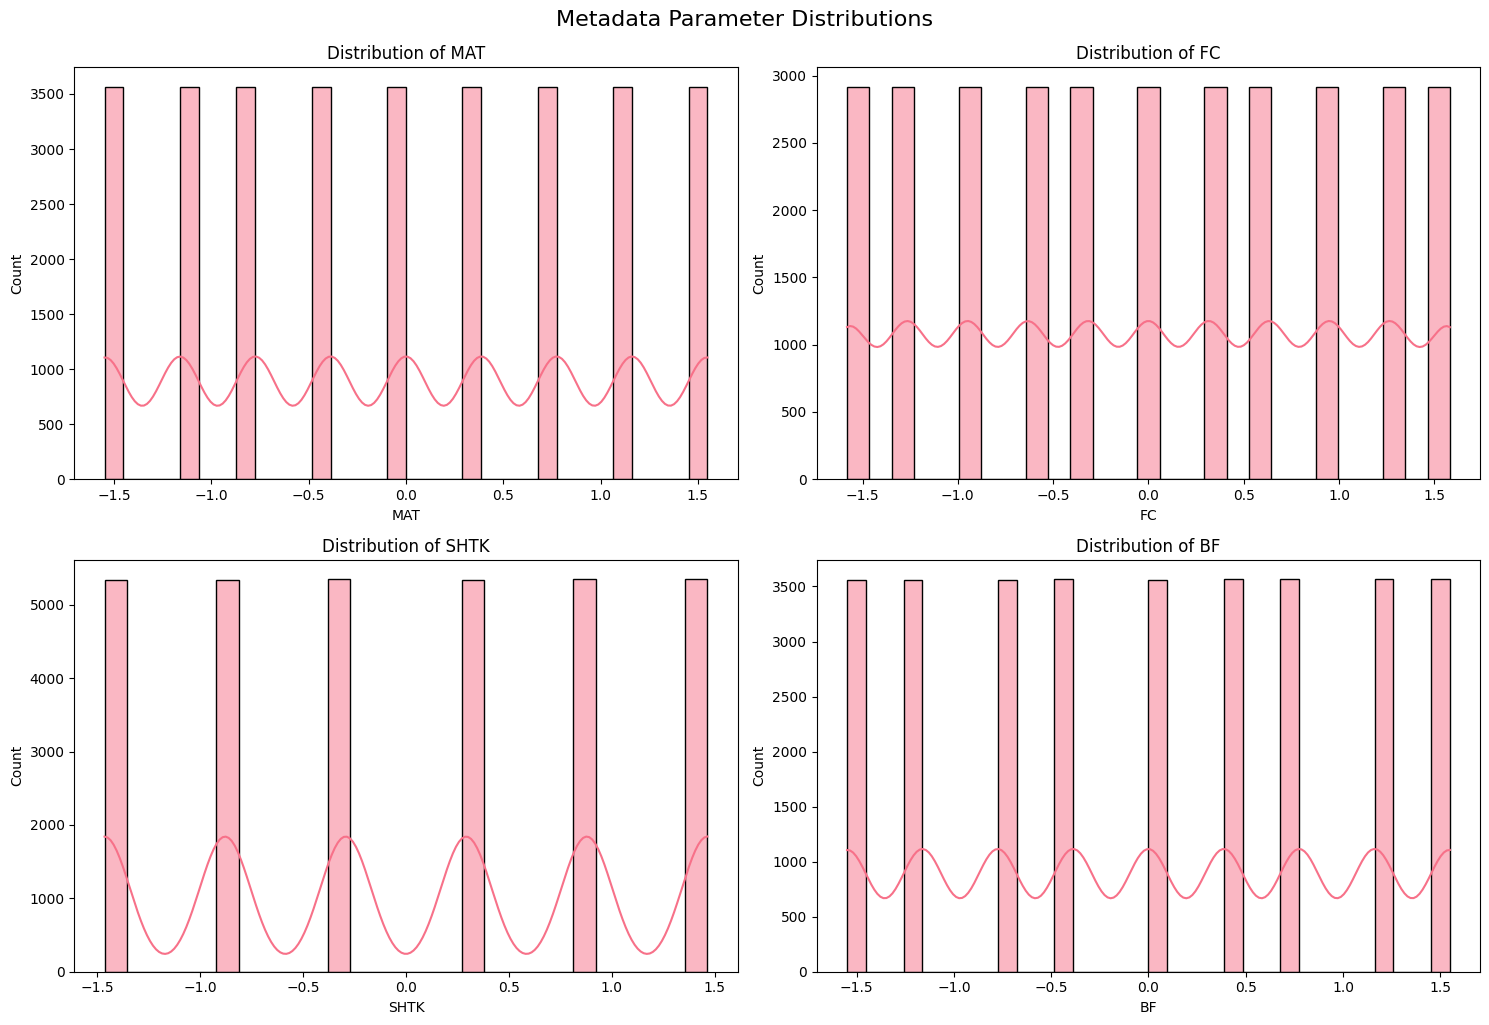

In [10]:
# Visualize metadata distributions
if metadata_file.exists():
    metadata = pd.read_csv(metadata_file)
    
    # Select numeric columns (exclude ID)
    numeric_cols = metadata.select_dtypes(include=[np.number]).columns.tolist()
    if 'ID' in numeric_cols:
        numeric_cols.remove('ID')
    
    if len(numeric_cols) > 0:
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        axes = axes.flatten()
        
        for i, col in enumerate(numeric_cols[:4]):  # Plot first 4 columns
            if i < len(axes):
                sns.histplot(metadata[col], ax=axes[i], kde=True)
                axes[i].set_title(f'Distribution of {col}')
        
        # Hide unused subplots
        for i in range(len(numeric_cols), len(axes)):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.suptitle('Metadata Parameter Distributions', y=1.02, fontsize=16)
        plt.show()
    else:
        print("No numeric columns found in metadata for visualization")

In [11]:
# Load and visualize sample simulation data
try:
    # Get first simulation
    dataset = DDACSDataset(data_dir, "h5")
    sim_id, metadata_vals, h5_path = dataset[0]
    
    print(f"Loading simulation data from: {h5_path.name}")
    
    # Load H5 data
    with h5py.File(h5_path, 'r') as f:
        print("H5 file structure:")
        def print_structure(name, obj):
            print(f"  {name}: {type(obj).__name__}")
        f.visititems(print_structure)
        
        # Try to load some sample data
        try:
            # This path might need adjustment based on actual H5 structure
            data = np.array(f["OP10"]["blank"]["node_displacement"])
            print(f"\nLoaded data shape: {data.shape}")
            print(f"Data type: {data.dtype}")
            print(f"Data range: [{data.min():.6f}, {data.max():.6f}]")
            
            # Visualize if data is reasonable size
            if data.size < 10000:  # Only plot if not too large
                plt.figure(figsize=(12, 4))
                
                plt.subplot(1, 2, 1)
                if len(data.shape) == 2:
                    plt.imshow(data, aspect='auto', cmap='viridis')
                    plt.colorbar()
                    plt.title('2D Data Heatmap')
                else:
                    plt.plot(data.flatten()[:1000])  # Plot first 1000 points
                    plt.title('Data Values (first 1000 points)')
                
                plt.subplot(1, 2, 2)
                plt.hist(data.flatten(), bins=50, alpha=0.7)
                plt.title('Data Value Distribution')
                plt.xlabel('Value')
                plt.ylabel('Frequency')
                
                plt.tight_layout()
                plt.show()
            else:
                print("Data too large for visualization (>10k elements)")
                
        except KeyError as e:
            print(f"Could not access expected data path: {e}")
            print("Please check the H5 file structure above and adjust the data path")
            
except Exception as e:
    print(f"Error loading simulation data: {e}")

Loading simulation data from: 113525.h5
H5 file structure:
  OP10: Group
  OP10/binder: Group
  OP10/binder/element_shell_ids: Dataset
  OP10/binder/element_shell_node_indexes: Dataset
  OP10/binder/element_shell_part_indexes: Dataset
  OP10/binder/node_acceleration: Dataset
  OP10/binder/node_coordinates: Dataset
  OP10/binder/node_displacement: Dataset
  OP10/binder/node_ids: Dataset
  OP10/binder/node_velocity: Dataset
  OP10/blank: Group
  OP10/blank/element_shell_bending_moment: Dataset
  OP10/blank/element_shell_effective_plastic_strain: Dataset
  OP10/blank/element_shell_effective_plastic_strain_all_ipt: Dataset
  OP10/blank/element_shell_ids: Dataset
  OP10/blank/element_shell_internal_energy: Dataset
  OP10/blank/element_shell_node_ids: Dataset
  OP10/blank/element_shell_node_indexes: Dataset
  OP10/blank/element_shell_normal_force: Dataset
  OP10/blank/element_shell_part_indexes: Dataset
  OP10/blank/element_shell_shear_force: Dataset
  OP10/blank/element_shell_strain: Datase

C:\Users\ac142464\Programmieren\DDACS\ddacs\pytorch.py:60: UserWarning: Found 1069/32071 simulations with existing H5 files
  warnings.warn(


## 6. Summary and Recommendations

### When to use each access method:

1. **DDACSDataset (PyTorch)**: 
   - ✅ Machine learning training with PyTorch
   - ✅ Random access to samples
   - ✅ Batch processing with DataLoader
   - ❌ Requires PyTorch dependency

2. **DDACSIterator (Lightweight)**:
   - ✅ No PyTorch dependency
   - ✅ Memory efficient streaming
   - ✅ Random sampling capability
   - ❌ Sequential access only

3. **iter_ddacs (Generator)**:
   - ✅ Ultra-fast streaming
   - ✅ Minimal memory footprint
   - ✅ Simple function interface
   - ❌ No random access or sampling

### Usage Examples:

```python
# For PyTorch ML workflows
from ddacs import DDACSDataset
dataset = DDACSDataset("./data")

# For lightweight iteration  
from ddacs import DDACSIterator
iterator = DDACSIterator("./data")

# For fast streaming
from ddacs import iter_ddacs
for sim_id, metadata, h5_path in iter_ddacs("./data"):
    # Process each simulation
    pass

# Users can also use shorter aliases:
from ddacs import DDACSDataset as Dataset
from ddacs import DDACSIterator as Iterator
```

### Next Steps:

- Explore the actual H5 file structure for your specific use case
- Implement custom data loading for your ML targets
- Consider data preprocessing and augmentation strategies
- Set up proper train/validation/test splits